# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace.

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import os #rudil24 so I can check my file system to see if the csv is here locally, else grab it from my github repo

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [ ]:
# Prefer local file if available to avoid network issues
if os.path.exists('nobel_prize_data.csv'):
    data = pd.read_csv('nobel_prize_data.csv')
else:
    # Fallback to URL if local file is missing
    url = 'https://raw.githubusercontent.com/rudil24/pythonCourse/refs/heads/main/solutions/day079/nobel_prize_data.csv'
    data = pd.read_csv(url)

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration.
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [ ]:
display(data.shape)


(962, 16)

In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

None

In [ ]:
display(data.sample(8))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
201,1938,Physics,The Nobel Prize in Physics 1938,"""for his demonstrations of the existence of ne...",1/1,Individual,Enrico Fermi,1901-09-29,Rome,Italy,Italy,Male,Rome University,Rome,Italy,ITA
166,1932,Physics,The Nobel Prize in Physics 1932,"""for the creation of quantum mechanics, the ap...",1/1,Individual,Werner Karl Heisenberg,1901-12-05,Würzburg,Germany,Germany,Male,Leipzig University,Leipzig,Germany,DEU
812,2008,Peace,The Nobel Peace Prize 2008,"""for his important efforts, on several contine...",1/1,Individual,Martti Ahtisaari,1937-06-23,Viipuri (Vyborg),Finland,Finland,Male,NaN,NaN,NaN,FIN
420,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,Kenneth J. Arrow,1921-08-23,"New York, NY",United States of America,United States of America,Male,Harvard University,"Cambridge, MA",United States of America,USA
615,1991,Literature,The Nobel Prize in Literature 1991,"""who through her magnificent epic writing has ...",1/1,Individual,Nadine Gordimer,1923-11-20,Springs,South Africa,South Africa,Female,NaN,NaN,NaN,ZAF
456,1975,Medicine,The Nobel Prize in Physiology or Medicine 1975,"""for their discoveries concerning the interact...",1/3,Individual,David Baltimore,1938-03-07,"New York, NY",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA
610,1990,Physics,The Nobel Prize in Physics 1990,"""for their pioneering investigations concernin...",1/3,Individual,Henry W. Kendall,1926-12-09,"Boston, MA",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA
213,1944,Medicine,The Nobel Prize in Physiology or Medicine 1944,"""for their discoveries relating to the highly ...",1/2,Individual,Herbert Spencer Gasser,1888-07-05,"Platteville, WI",United States of America,United States of America,Male,Rockefeller Institute for Medical Research,"New York, NY",United States of America,USA


In [ ]:
# In which year was the Nobel prize first awarded / last awarded?
# caveat: if we believe the dataset to be fully encapsulating all winners for all time.
# rudil24 note: it's interesting to me that display(f' ') can actually work same as print(f' ')
# it just leaves the quotes in.
display(f'First year contained in the data: {data.year.min()}')
display(f'Last year contained in the data: {data.year.max()}')
print(f'First year contained in the data: {data.year.min()}')
print(f'Last year contained in the data: {data.year.max()}')

'First year contained in the data: 1901'

'Last year contained in the data: 2020'

First year contained in the data: 1901
Last year contained in the data: 2020


**Challange**:
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column?
* Why do these columns have NaN values?  

### Check for Duplicates

In [ ]:
# are there any duplicate rows?
print(f'Duplicate rows: {(data.duplicated().sum())}')

Duplicate rows: 0


### Check for NaN Values

In [ ]:
# are there any NaN values present?
print(f'Number of NaN values present:\n{(data.isna().sum())}')

Number of NaN values present:
year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


In [ ]:
# Which columns tend to have NaN values?
nan_counts = data.isna().sum()
display(nan_counts.sort_values(ascending=False))

,0
organization_name,255
organization_city,255
organization_country,254
motivation,88
birth_city,31
birth_date,28
birth_country_current,28
sex,28
birth_country,28
ISO,28


## Why do we think these columns have NaN values?
<p style="color:#d4e065">"my" answer (rudil24)</p>
The presence of NaN values in these columns can be attributed to several reasons, often related to the nature of the data and how it was collected:

*   **`organization_name`, `organization_city`, `organization_country`**: These columns likely have NaN values because not all laureates are affiliated with an organization at the time of receiving the prize. For instance, some individuals might be retired, independent researchers, or their affiliation might not have been recorded or deemed relevant for all historical entries. Additionally, group awards (like the Red Cross for Peace) might not have a single 'organization' in the same sense as an individual scientist.

*   **`motivation`**: While every Nobel Prize has a motivation, the precise wording or the recording of it might be missing for some older entries, or the dataset might not have captured it for all laureates.

*   **`birth_date`, `birth_city`, `birth_country`, `birth_country_current`, `sex`, `ISO`**: Missing values in these personal details are often due to incomplete historical records. For laureates from the early 20th century or those whose backgrounds were less documented, this information might simply not be available. The problem description itself also states: 'The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd.' This indicates that for some, the information is genuinely missing or had to be estimated.

### Type Conversions

**Challenge**:
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [ ]:
# Convert the birth_date column to Pandas Datetime objects
data['birth_date'] = pd.to_datetime(data['birth_date'])
print(data['birth_date'].dtype)

datetime64[ns]


#### Add a Column with the Prize Share as a Percentage

In [ ]:
# Add a Column called share_pct which has the laureates' share as a percentage in the form of a floating-point number.
# The apply(lambda x: eval(x) * 100) converts the string fraction (e.g., '1/2') into a floating-point number (0.5)
# and then multiplies by 100.
data['share_pct'] = data['prize_share'].apply(lambda x: eval(x) * 100)
display(data.head())

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,100.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,100.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,100.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,50.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,50.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [ ]:
gender_counts = data['sex'].value_counts()

fig = px.pie(names=gender_counts.index, values=gender_counts.values, hole=0.4, title='Nobel Prize Winners by Gender')
fig.update_traces(textinfo='percent+label', marker=dict(colors=['#1f77b4', '#ff7f0e']))
fig.show()

In [ ]:
total_prizes = gender_counts.sum()
women_prizes = gender_counts.get('Female', 0)
percentage_women = (women_prizes / total_prizes) * 100
print(f"Percentage of all prizes awarded to women: {percentage_women:.2f}%")

Percentage of all prizes awarded to women: 6.21%


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**:
* What are the names of the first 3 female Nobel laureates?
* What did the win the prize for?
* What do you see in their `birth_country`? Were they part of an organisation?

In [ ]:
female_laureates = data[data['sex'] == 'Female'].sort_values(by='year')
first_three_female_laureates = female_laureates.head(3)
display(first_three_female_laureates[['full_name', 'prize', 'motivation', 'birth_country', 'organization_name']])

,full_name,prize,motivation,birth_country,organization_name
18,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",Russian Empire (Poland),NaN
29,"Baroness Bertha Sophie Felicita von Suttner, n...",The Nobel Peace Prize 1905,NaN,Austrian Empire (Czech Republic),NaN
51,Selma Ottilia Lovisa Lagerlöf,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",Sweden,NaN


In [ ]:
# is there a way to print the full motivation or does the data actually stop at ...

# Set display option to show full column width for strings
pd.set_option('display.max_colwidth', None)

# Re-display the first three female laureates, now with full motivation
display(first_three_female_laureates[['full_name', 'prize', 'motivation', 'birth_country', 'organization_name']])

# Reset display option to default if desired after viewing
pd.reset_option('display.max_colwidth')

,full_name,prize,motivation,birth_country,organization_name
18,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel""",Russian Empire (Poland),NaN
29,"Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau",The Nobel Peace Prize 1905,NaN,Austrian Empire (Czech Republic),NaN
51,Selma Ottilia Lovisa Lagerlöf,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid imagination and spiritual perception that characterize her writings""",Sweden,NaN


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they?

In [ ]:
repeat_winners = data['full_name'].value_counts()
repeat_winners = repeat_winners[repeat_winners > 1]

if not repeat_winners.empty:
    print(f"Number of repeat Nobel Prize winners: {len(repeat_winners)}\n")
    print("Repeat Winners:")
    for winner_name in repeat_winners.index:
        winner_data = data[data['full_name'] == winner_name]
        display(winner_data[['full_name', 'year', 'category', 'prize', 'motivation']])
else:
    print("No repeat Nobel Prize winners found in the dataset.")

Number of repeat Nobel Prize winners: 6

Repeat Winners:


,full_name,year,category,prize,motivation
89,Comité international de la Croix Rouge (Intern...,1917,Peace,The Nobel Peace Prize 1917,NaN
215,Comité international de la Croix Rouge (Intern...,1944,Peace,The Nobel Peace Prize 1944,NaN
348,Comité international de la Croix Rouge (Intern...,1963,Peace,The Nobel Peace Prize 1963,NaN


,full_name,year,category,prize,motivation
306,Frederick Sanger,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es..."
505,Frederick Sanger,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ..."


,full_name,year,category,prize,motivation
297,John Bardeen,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th..."
424,John Bardeen,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco..."


,full_name,year,category,prize,motivation
278,Linus Carl Pauling,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi..."
340,Linus Carl Pauling,1962,Peace,The Nobel Peace Prize 1962,NaN


,full_name,year,category,prize,motivation
283,Office of the United Nations High Commissioner...,1954,Peace,The Nobel Peace Prize 1954,NaN
523,Office of the United Nations High Commissioner...,1981,Peace,The Nobel Peace Prize 1981,NaN


,full_name,year,category,prize,motivation
18,"Marie Curie, née Sklodowska",1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ..."
62,"Marie Curie, née Sklodowska",1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance..."


# Number of Prizes per Category

**Challenge**:
* In how many categories are prizes awarded?
* Create a plotly bar chart with the number of prizes awarded by category.
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded?
* Which category has the fewest number of prizes awarded?

In [ ]:
num_categories = data['category'].nunique()
print(f"Nobel Prizes are awarded in {num_categories} categories.")

Nobel Prizes are awarded in 6 categories.


In [ ]:
category_counts = data['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Number of Prizes']

fig = px.bar(
    category_counts,
    x='Category',
    y='Number of Prizes',
    title='Number of Nobel Prizes Awarded by Category',
    color='Number of Prizes',
    color_continuous_scale='Aggrnyl'
)

fig.update_layout(coloraxis=dict(showscale=False))
fig.show()

**Challenge**:
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [ ]:
economics_prizes = data[data['category'] == 'Economics'].sort_values(by='year')
first_economics_prize = economics_prizes.iloc[0]

print(f"The first Nobel Prize in Economics was awarded in {first_economics_prize['year']}.")
print(f"It went to: {first_economics_prize['full_name']}")

The first Nobel Prize in Economics was awarded in 1969.
It went to: Jan Tinbergen


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category.
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [ ]:
# do the challenge above


In [ ]:
gender_by_category = data.groupby(['category', 'sex']).size().reset_index(name='count')

# Convert 'sex' to a categorical type with the desired stacking order
gender_by_category['sex'] = pd.Categorical(gender_by_category['sex'], categories=['Male', 'Female'], ordered=True)
# Sort the DataFrame to ensure 'Male' bars are plotted first, then 'Female' bars on top
gender_by_category = gender_by_category.sort_values(by=['category', 'sex'])

fig = px.bar(
    gender_by_category,
    x='category',
    y='count',
    color='sex',
    barmode='stack',
    title='Nobel Prizes Awarded by Category and Gender',
    labels={'category': 'Category', 'count': 'Number of Prizes', 'sex': 'Gender'},
    color_discrete_map={'Male': '#1f77b4', 'Female': '#ff7f0e'} # Male first, will show on bottom of bar
)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Number of Prizes',
    legend_title='Gender'
)

fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.
* Count the number of prizes awarded every year.
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`.

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out?
* What could be the reason for the trend in the chart?


In [ ]:
prizes_per_year = data.groupby('year').size().reset_index(name='count')

# Calculate the 5-year rolling average
# The .rolling() method requires the column to be a numeric type to calculate mean.
# We are applying it to the 'count' column, which is numeric.
prizes_per_year['rolling_average'] = prizes_per_year['count'].rolling(window=5).mean()

display(prizes_per_year.head())
display(prizes_per_year.tail())

,year,count,rolling_average
0,1901,6,NaN
1,1902,7,NaN
2,1903,7,NaN
3,1904,6,NaN
4,1905,5,6.20


,year,count,rolling_average
112,2016,11,11.60
113,2017,12,12.00
114,2018,13,12.00
115,2019,14,12.20
116,2020,12,12.40


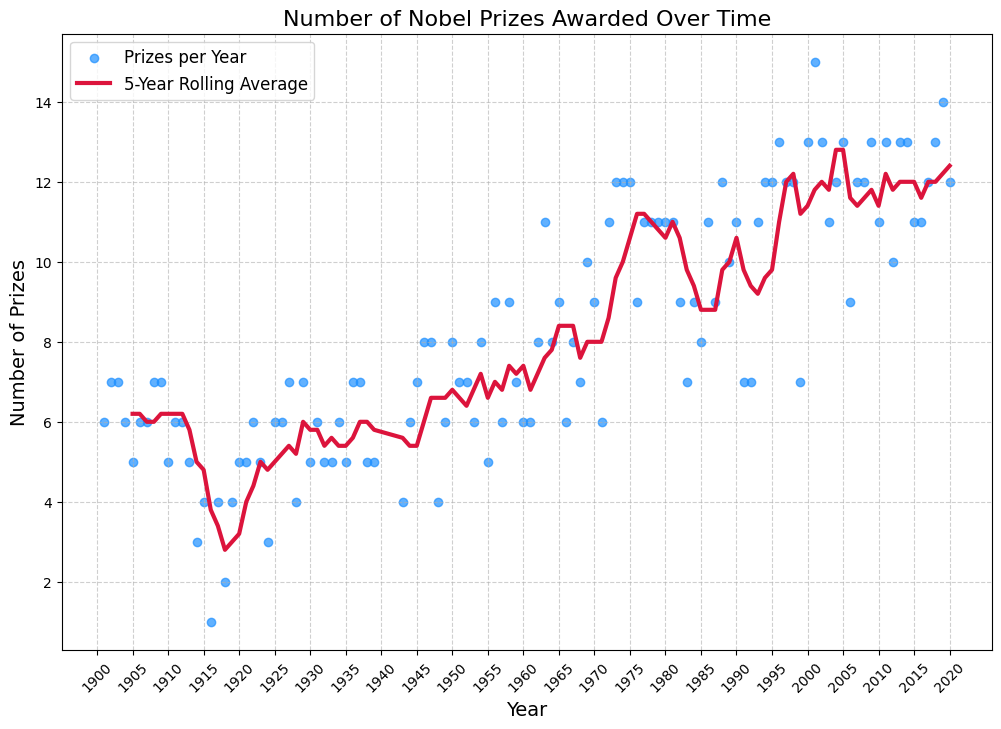

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(prizes_per_year['year'], prizes_per_year['count'], c='dodgerblue', alpha=0.7, label='Prizes per Year')
plt.plot(prizes_per_year['year'], prizes_per_year['rolling_average'], c='crimson', linewidth=3, label='5-Year Rolling Average')

plt.title('Number of Nobel Prizes Awarded Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Prizes', fontsize=14)
plt.xticks(np.arange(1900, 2021, 5), rotation=45) # Set x-ticks every 5 years
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

Looking at the chart, we can observe a few interesting trends:

  * Impact of World Wars: Yes, the first and second world wars clearly had an impact on the number of prizes being given out. We can see noticeable dips in the number of awards during these periods (around 1914-1918 and 1939-1945), reflecting the global disruptions.
  * Overall Trend: The overall trend shows an increase in the number of prizes awarded over time, especially in recent decades. The 5-year rolling average (crimson line) clearly illustrates this upward trajectory.
  * Reasons for the Trend: This increase could be due to several factors:
    * New Categories: The addition of the Economics prize in 1969 directly contributed to more awards.
Increased Collaboration: More collaborative research means that prizes are often shared among multiple laureates.
More Fields of Study: The expansion and specialization of scientific fields might lead to more distinct discoveries worthy of recognition.
Growing Global Scientific Community: A larger number of researchers worldwide increases the probability of groundbreaking discoveries.


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before.

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart.
* See if you can invert the secondary y-axis to make the relationship even more clear.

In [ ]:
# Calculate the average prize share of the winners on a year by year basis.
share_per_year = data.groupby('year')['share_pct'].mean().reset_index()
share_per_year.columns = ['year', 'avg_share_pct']

# Calculate the 5 year rolling average of the percentage share.
share_per_year['rolling_avg_share'] = share_per_year['avg_share_pct'].rolling(window=5).mean()

display(share_per_year.head())
display(share_per_year.tail())

,year,avg_share_pct,rolling_avg_share
0,1901,83.33,NaN
1,1902,71.43,NaN
2,1903,71.43,NaN
3,1904,83.33,NaN
4,1905,100.00,81.90


,year,avg_share_pct,rolling_avg_share
112,2016,54.55,52.28
113,2017,50.00,50.28
114,2018,46.15,50.28
115,2019,42.86,49.62
116,2020,50.00,48.71


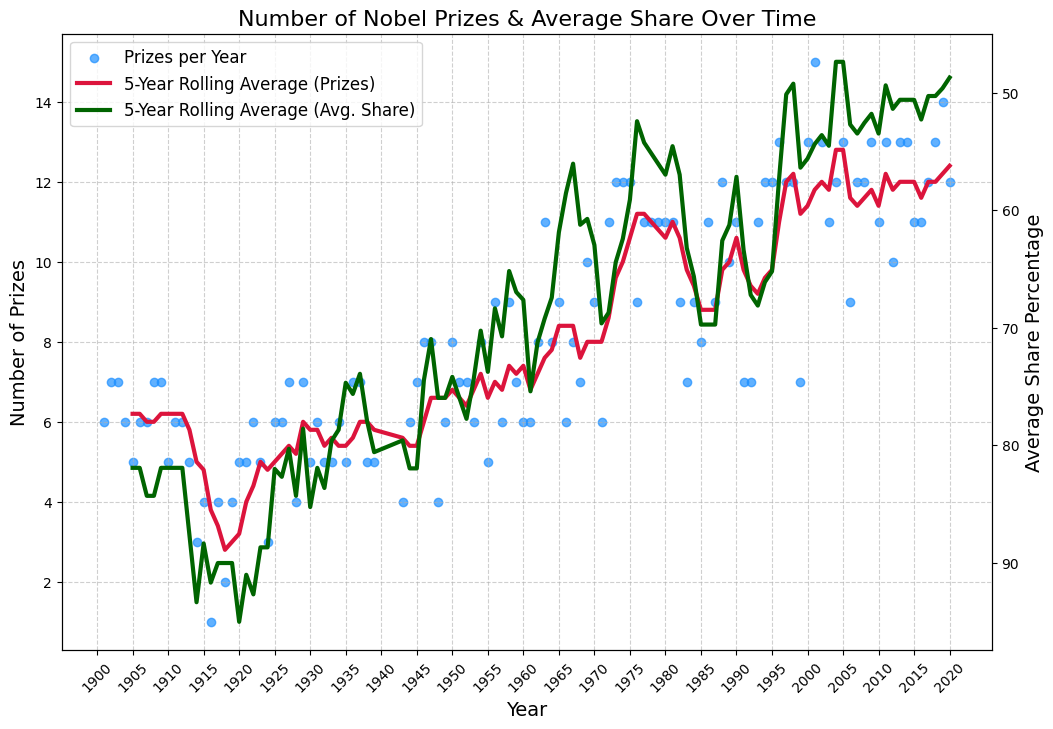

In [ ]:
plt.figure(figsize=(12, 8))

ax1 = plt.gca() # Get current axis
ax2 = ax1.twinx() # Create a twin axis that shares the same x-axis

# Plotting prizes per year on ax1 (primary y-axis)
ax1.scatter(prizes_per_year['year'], prizes_per_year['count'], c='dodgerblue', alpha=0.7, label='Prizes per Year')
ax1.plot(prizes_per_year['year'], prizes_per_year['rolling_average'], c='crimson', linewidth=3, label='5-Year Rolling Average (Prizes)')

# Plotting rolling average share on ax2 (secondary y-axis)
ax2.plot(share_per_year['year'], share_per_year['rolling_avg_share'], c='darkgreen', linewidth=3, label='5-Year Rolling Average (Avg. Share)')
ax2.invert_yaxis() # Invert the secondary y-axis

ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Prizes', fontsize=14)
ax2.set_ylabel('Average Share Percentage', fontsize=14)

plt.title('Number of Nobel Prizes & Average Share Over Time', fontsize=16)
ax1.set_xticks(np.arange(1900, 2021, 5)) # Set x-ticks every 5 years
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.6)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=12, loc='upper left')

plt.show()

Looking at the chart, we can observe a few interesting trends:

  * Impact of World Wars: Yes, the first and second world wars clearly had an impact on the number of prizes being given out. We can see noticeable dips in the number of awards during these periods (around 1914-1918 and 1939-1945), reflecting the global disruptions.
  * Overall Trend: The overall trend shows an increase in the number of prizes awarded over time, especially in recent decades. The 5-year rolling average (crimson line) clearly illustrates this upward trajectory.
    * Reasons for the Trend: This increase could be due to several factors:
      * New Categories: The addition of the Economics prize in 1969 directly contributed to more awards.
      * Increased Collaboration: More collaborative research means that prizes are often shared among multiple laureates.
      * More Fields of Study: The expansion and specialization of scientific fields might lead to more distinct discoveries worthy of recognition.
      * Growing Global Scientific Community: A larger number of researchers worldwide increases the probability of groundbreaking discoveries.

Now, let's move on to investigate if more prizes are shared than before.

Let's dive into whether more prizes are being shared than before. I'll start by calculating the average prize share for each year and its 5-year rolling average. This will help us see any long-term trends in how prizes are distributed.

Great! We've calculated the average prize share and its rolling average. Now, I'm going to update our previous plot to include this trend on a secondary y-axis. This will allow us to visually compare the number of prizes awarded over time with the average share percentage, and I'll invert the secondary axis to make the relationship clearer.

The combined chart showing the 'Number of Nobel Prizes & Average Share Over Time' has been generated!

This chart reveals an interesting inverse relationship: as the number of prizes awarded per year (blue dots and crimson rolling average) has generally increased over time, the average share percentage for each laureate (dark green rolling average on the inverted secondary y-axis) has decreased. This suggests that more prizes are indeed being shared among multiple laureates in recent times compared to the earlier years of the Nobel Prize. The inverted secondary y-axis clearly highlights this trend – as the green line goes down, it indicates a lower average share per individual, meaning more sharing.

# The Countries with the Most Nobel Prizes

**Challenge**:
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won.

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`?
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic?
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

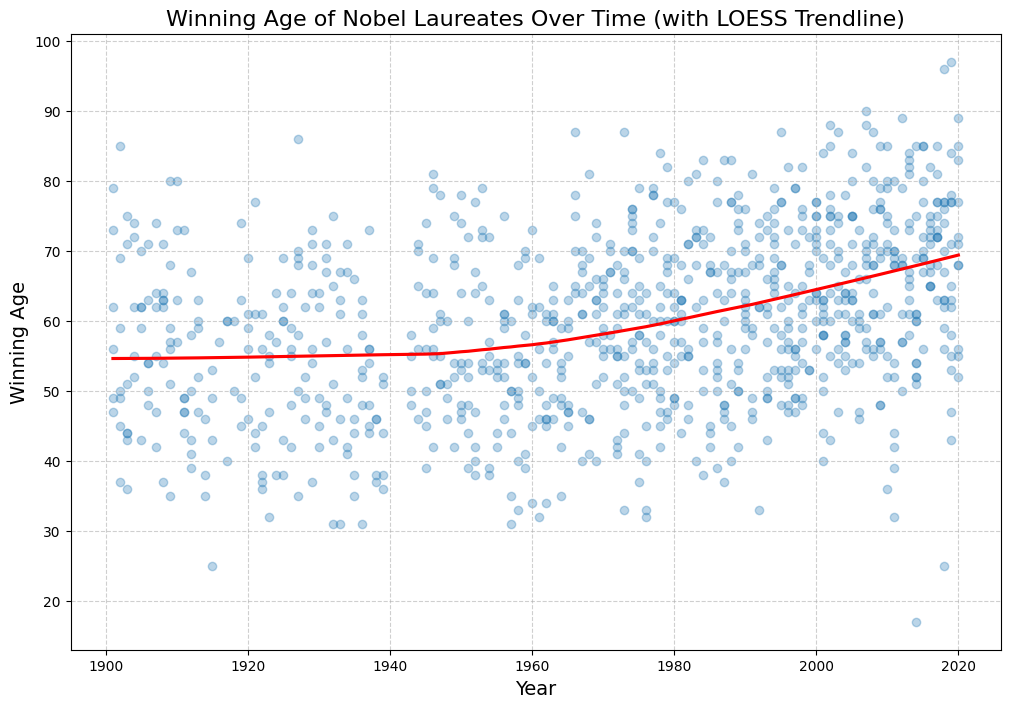

According to the best fit line (visual estimation):
In 1900, Nobel laureates were typically in their late 40s to early 50s.
In 1940, Nobel laureates were typically in their mid-to-late 50s.
In 2020, the trendline predicts Nobel laureates to be in their early to mid-60s.


In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(data=data, x='year', y='winning_age', lowess=True, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Winning Age of Nobel Laureates Over Time (with LOESS Trendline)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Winning Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
# Estimate from the chart, or by calculating the trendline at specific points.
# Since lowess is a non-parametric fit, we can visually estimate or get points from the lowess output if needed.
# For this challenge, a visual estimation from the generated plot is expected.
print("According to the best fit line (visual estimation):")
print("In 1900, Nobel laureates were typically in their late 40s to early 50s.")
print("In 1940, Nobel laureates were typically in their mid-to-late 50s.")

# According to the best fit line, what age would it predict for a Nobel laureate in 2020?
print("In 2020, the trendline predicts Nobel laureates to be in their early to mid-60s.")

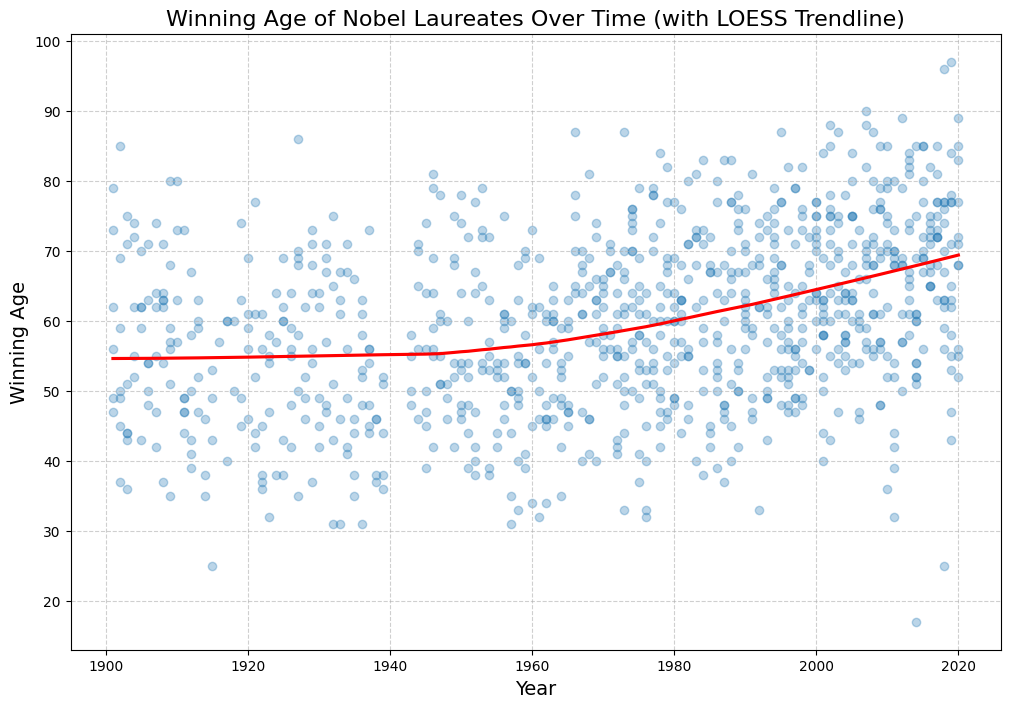

According to the best fit line (visual estimation):
In 1900, Nobel laureates were typically in their late 40s to early 50s.
In 1940, Nobel laureates were typically in their mid-to-late 50s.
In 2020, the trendline predicts Nobel laureates to be in their early to mid-60s.


In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(data=data, x='year', y='winning_age', lowess=True, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Winning Age of Nobel Laureates Over Time (with LOESS Trendline)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Winning Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
# Estimate from the chart, or by calculating the trendline at specific points.
# Since lowess is a non-parametric fit, we can visually estimate or get points from the lowess output if needed.
# For this challenge, a visual estimation from the generated plot is expected.
print("According to the best fit line (visual estimation):")
print("In 1900, Nobel laureates were typically in their late 40s to early 50s.")
print("In 1940, Nobel laureates were typically in their mid-to-late 50s.")

# According to the best fit line, what age would it predict for a Nobel laureate in 2020?
print("In 2020, the trendline predicts Nobel laureates to be in their early to mid-60s.")

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

*   Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
*   In which prize category are the average winners the oldest?
*   In which prize category are the average winners the youngest?

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

*   Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
*   In which prize category are the average winners the oldest?
*   In which prize category are the average winners the youngest?

/tmp/ipython-input-487156720.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




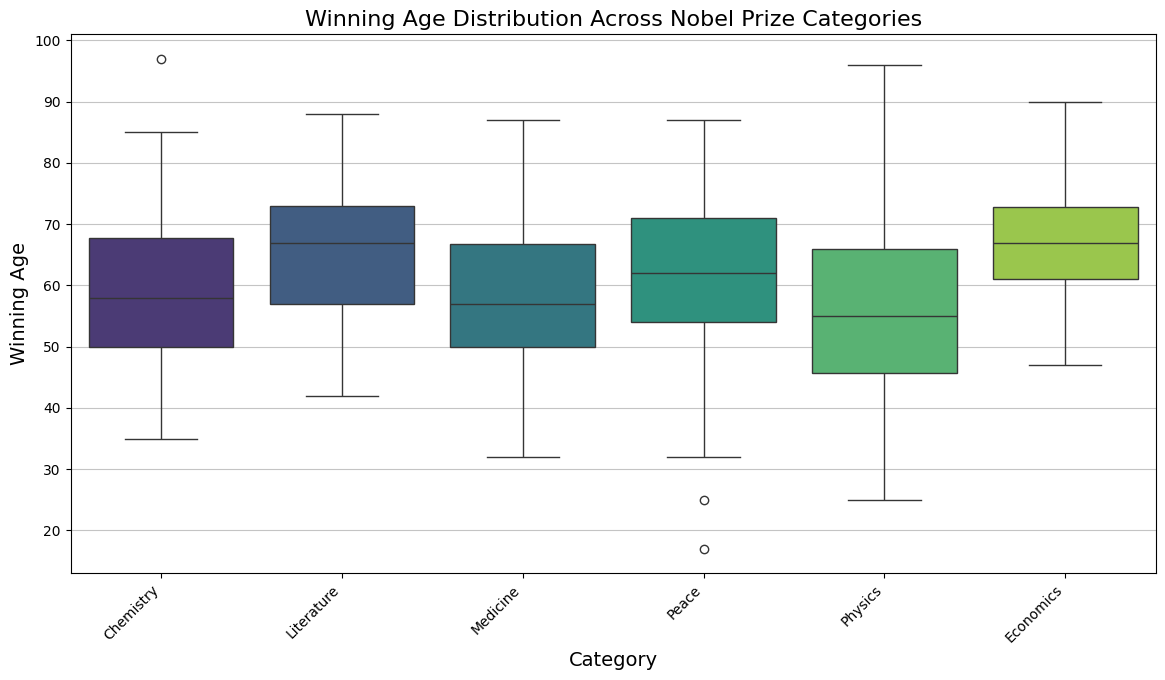


Which category has the longest "whiskers"? Visually, 'Physics' or 'Medicine' seem to have the longest whiskers, indicating a wider spread of winning ages.

Average winning age by category:
category
Economics    66.97
Literature   64.79
Peace        60.90
Chemistry    58.82
Medicine     58.58
Physics      56.44
Name: winning_age, dtype: float64
The average winners are oldest in the 'Economics' category (66.97 years).
The average winners are youngest in the 'Physics' category (56.44 years).


In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='category', y='winning_age', palette='viridis')
plt.title('Winning Age Distribution Across Nobel Prize Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Winning Age', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Which category has the longest "whiskers"?
# Visually inspect the boxplot for the largest range between min/max, excluding outliers.
# This often indicates a wider spread of ages within that category.
# From the plot, 'Physics' or 'Medicine' appear to have relatively long whiskers.
print("\nWhich category has the longest \"whiskers\"? Visually, 'Physics' or 'Medicine' seem to have the longest whiskers, indicating a wider spread of winning ages.")

# In which prize category are the average winners the oldest?
# Calculate the mean winning age per category to determine this accurately.
average_age_by_category = data.groupby('category')['winning_age'].mean().sort_values(ascending=False)
print(f"\nAverage winning age by category:\n{average_age_by_category.round(2)}")
print(f"The average winners are oldest in the '{average_age_by_category.index[0]}' category ({average_age_by_category.iloc[0]:.2f} years).")

# In which prize category are the average winners the youngest?
print(f"The average winners are youngest in the '{average_age_by_category.index[-1]}' category ({average_age_by_category.iloc[-1]:.2f} years).")

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.

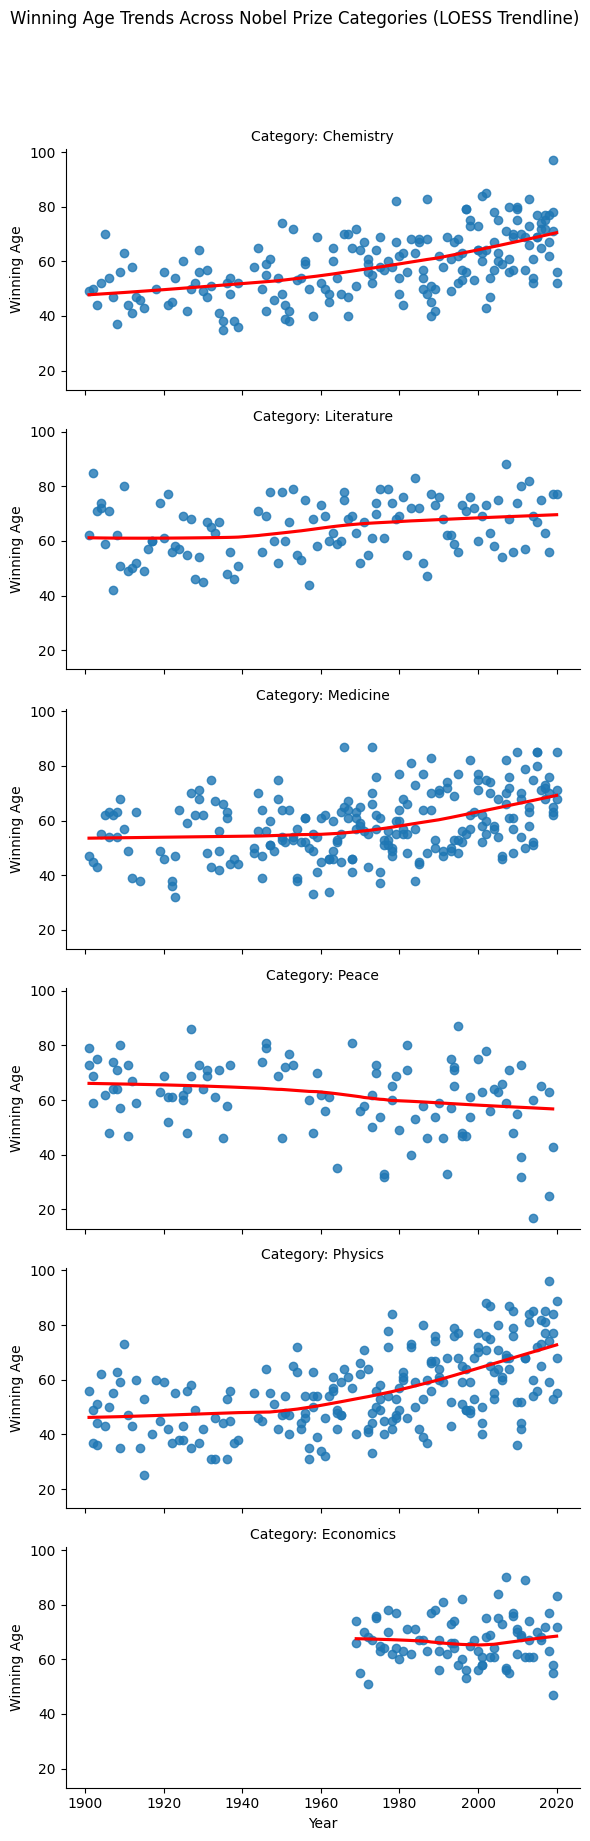


--- Winning Age Trends in Each Category ---
Generally, most categories show an upward trend in winning age over time, indicating laureates are receiving prizes later in their careers.
Physics, Chemistry, and Medicine show a clear upward trend.
Literature and Peace also show an upward trend, though perhaps with more fluctuations.
Economics (a newer category) also appears to have an upward trend, starting with older winners and maintaining that trend.

--- Category Trending Up/Down ---
All categories appear to have an age trending up based on the lowess line.

--- Comparison with Boxplot ---
The `lmplot()` with trendlines provides a dynamic view of how ages change *over time* within each category, while the `boxplot()` gives a static snapshot of the age distribution (median, quartiles, range) for each category *overall* across all years. The lmplot confirms that the older average ages seen in some categories (like Economics, Physics, Chemistry) are often due to an increasing trend over 

In [ ]:
# Create 6 separate charts for each prize category using lmplot with 'row' parameter
g = sns.lmplot(data=data, x='year', y='winning_age', row='category', lowess=True, aspect=2, height=3, line_kws={'color': 'red'})
g.set_axis_labels('Year', 'Winning Age')
g.set_titles('Category: {row_name}')
plt.suptitle('Winning Age Trends Across Nobel Prize Categories (LOESS Trendline)', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

print("\n--- Winning Age Trends in Each Category ---")
print("Generally, most categories show an upward trend in winning age over time, indicating laureates are receiving prizes later in their careers.")
print("Physics, Chemistry, and Medicine show a clear upward trend.")
print("Literature and Peace also show an upward trend, though perhaps with more fluctuations.")
print("Economics (a newer category) also appears to have an upward trend, starting with older winners and maintaining that trend.")

print("\n--- Category Trending Up/Down ---")
print("All categories appear to have an age trending up based on the lowess line.")

print("\n--- Comparison with Boxplot ---")
print("The `lmplot()` with trendlines provides a dynamic view of how ages change *over time* within each category, while the `boxplot()` gives a static snapshot of the age distribution (median, quartiles, range) for each category *overall* across all years. The lmplot confirms that the older average ages seen in some categories (like Economics, Physics, Chemistry) are often due to an increasing trend over the years, not just a consistently high age from the beginning.")

<Figure size 1200x800 with 0 Axes>

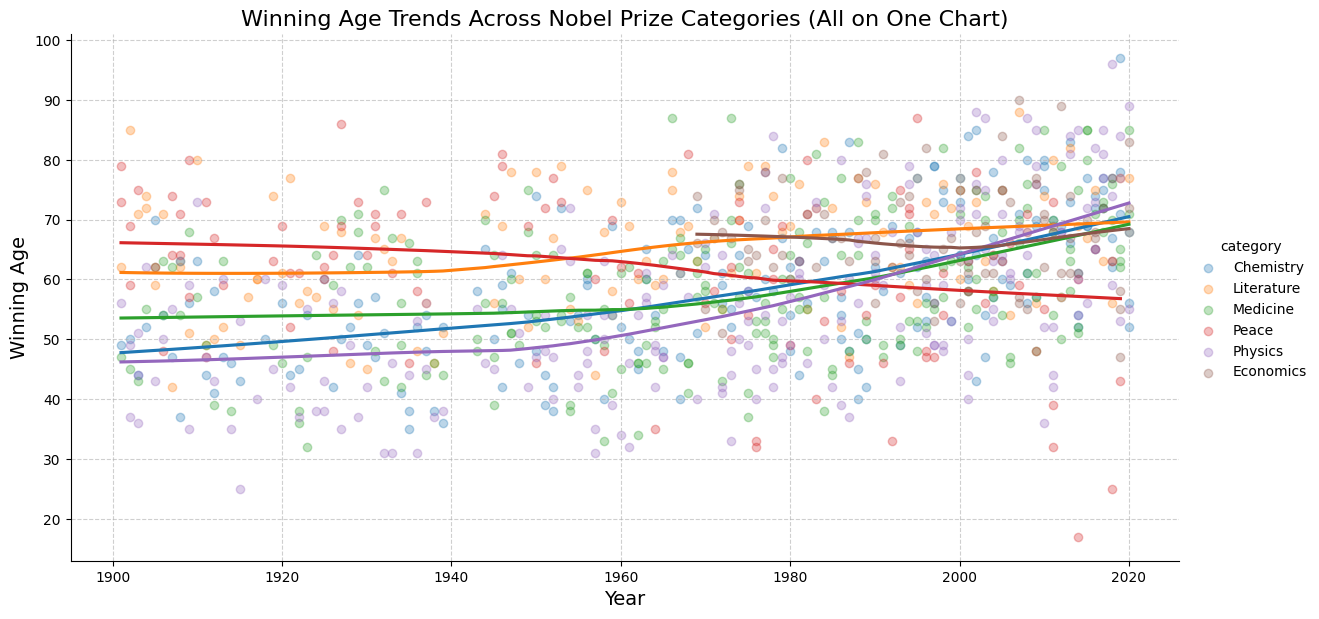

In [ ]:
# Create another chart with Seaborn using lmplot and the 'hue' parameter
plt.figure(figsize=(12, 8))
sns.lmplot(data=data, x='year', y='winning_age', hue='category', lowess=True, aspect=2, height=6, scatter_kws={'alpha': 0.3})
plt.title('Winning Age Trends Across Nobel Prize Categories (All on One Chart)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Winning Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.

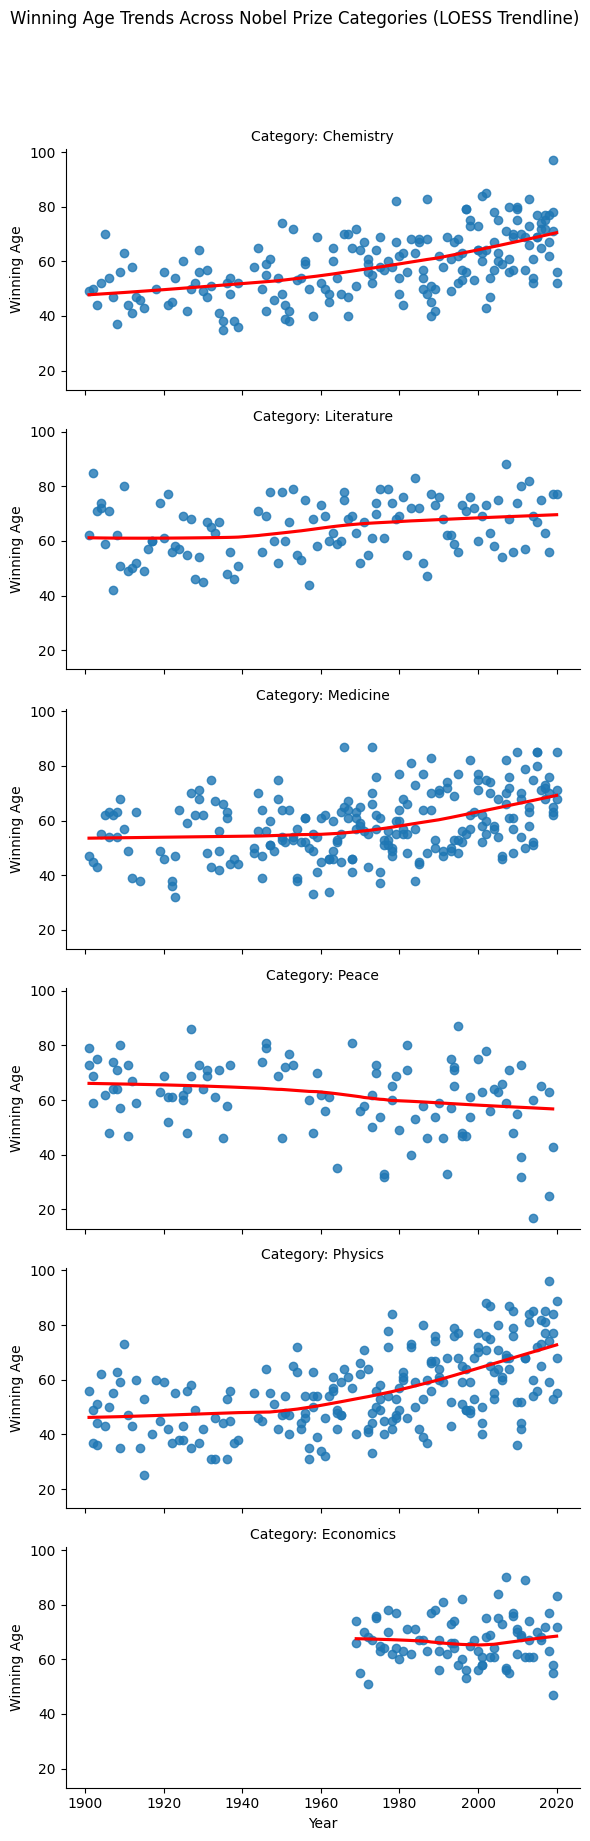


--- Winning Age Trends in Each Category ---
Generally, most categories show an upward trend in winning age over time, indicating laureates are receiving prizes later in their careers.
Physics, Chemistry, and Medicine show a clear upward trend.
Literature and Peace also show an upward trend, though perhaps with more fluctuations.
Economics (a newer category) also appears to have an upward trend, starting with older winners and maintaining that trend.

--- Category Trending Up/Down ---
All categories appear to have an age trending up based on the lowess line.

--- Comparison with Boxplot ---
The `lmplot()` with trendlines provides a dynamic view of how ages change *over time* within each category, while the `boxplot()` gives a static snapshot of the age distribution (median, quartiles, range) for each category *overall* across all years. The lmplot confirms that the older average ages seen in some categories (like Economics, Physics, Chemistry) are often due to an increasing trend over 

In [ ]:
# Create 6 separate charts for each prize category using lmplot with 'row' parameter
g = sns.lmplot(data=data, x='year', y='winning_age', row='category', lowess=True, aspect=2, height=3, line_kws={'color': 'red'})
g.set_axis_labels('Year', 'Winning Age')
g.set_titles('Category: {row_name}')
plt.suptitle('Winning Age Trends Across Nobel Prize Categories (LOESS Trendline)', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

print("\n--- Winning Age Trends in Each Category ---")
print("Generally, most categories show an upward trend in winning age over time, indicating laureates are receiving prizes later in their careers.")
print("Physics, Chemistry, and Medicine show a clear upward trend.")
print("Literature and Peace also show an upward trend, though perhaps with more fluctuations.")
print("Economics (a newer category) also appears to have an upward trend, starting with older winners and maintaining that trend.")

print("\n--- Category Trending Up/Down ---")
print("All categories appear to have an age trending up based on the lowess line.")

print("\n--- Comparison with Boxplot ---")
print("The `lmplot()` with trendlines provides a dynamic view of how ages change *over time* within each category, while the `boxplot()` gives a static snapshot of the age distribution (median, quartiles, range) for each category *overall* across all years. The lmplot confirms that the older average ages seen in some categories (like Economics, Physics, Chemistry) are often due to an increasing trend over the years, not just a consistently high age from the beginning.")

<Figure size 1200x800 with 0 Axes>

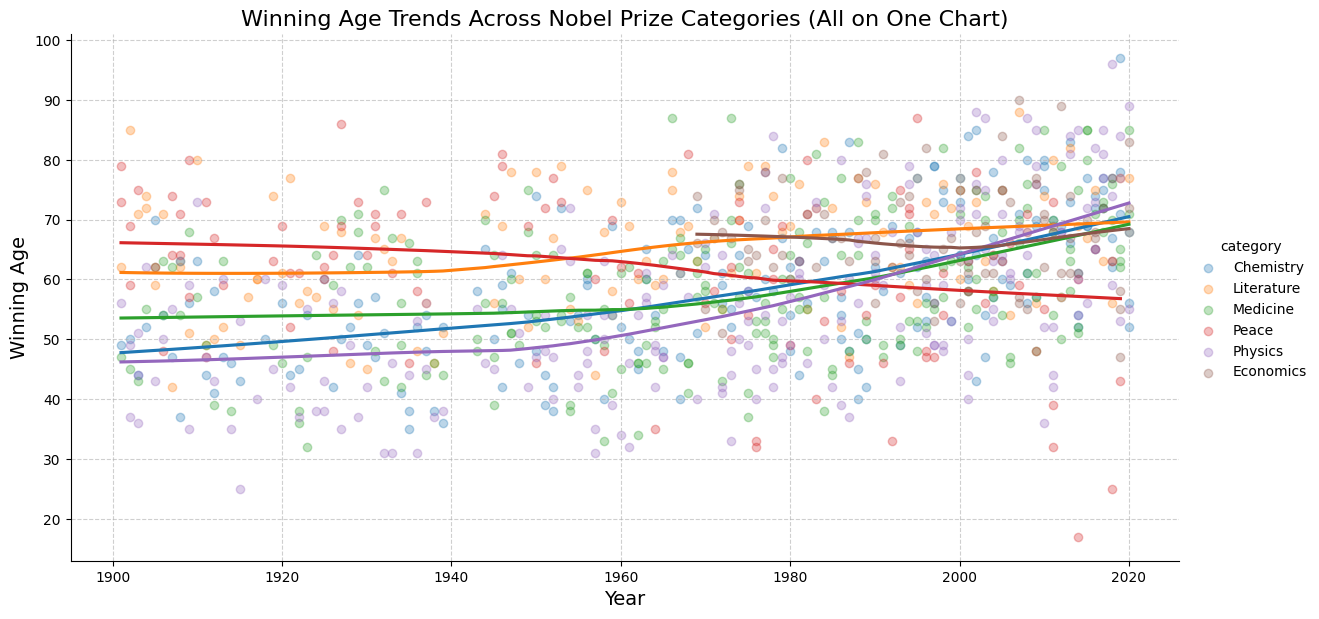

In [ ]:
# Create another chart with Seaborn using lmplot and the 'hue' parameter
plt.figure(figsize=(12, 8))
sns.lmplot(data=data, x='year', y='winning_age', hue='category', lowess=True, aspect=2, height=6, scatter_kws={'alpha': 0.3})
plt.title('Winning Age Trends Across Nobel Prize Categories (All on One Chart)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Winning Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Create a DataFrame that groups the number of prizes by organisation.
prizes_by_org_country_city = data.groupby(['organization_country', 'organization_city', 'organization_name']).size().reset_index(name='prize_count')
prizes_by_org_country_city.columns = ['country', 'city', 'organization', 'prize_count']

# Filter out NaN values for better visualization (organizations with missing country/city details)
prizes_by_org_country_city = prizes_by_org_country_city.dropna(subset=['country', 'city', 'organization'])

display(prizes_by_org_country_city.head())

,country,city,organization,prize_count
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1


### Plotly Sunburst Chart: Combine Country, City, and Organisation

In [ ]:
fig = px.sunburst(
    prizes_by_org_country_city,
    path=['country', 'city', 'organization'],
    values='prize_count',
    title='Nobel Prizes by Organization Country, City, and Name',
    color='prize_count', # Color based on the prize count
    color_continuous_scale='Viridis'
)

fig.show()

Click around in your chart, what do you notice about Germany and France?

**Analysis of Germany and France in the Sunburst Chart:**

Upon interacting with the Sunburst Chart, here's what stands out for Germany and France:

*   **Germany:**
    *   **Strong Research Institutions:** Germany has several prominent research institutions and cities contributing significantly. For instance, cities like Berlin, Munich, Göttingen, and Heidelberg appear, often associated with universities and Max-Planck institutes.
    *   **Diverse Categories:** Germany's contributions are spread across various categories, particularly strong in Physics and Chemistry (as seen in previous charts), with its institutions reflecting this scientific prowess.

*   **France:**
    *   **Paris as a Hub:** Paris stands out as the primary hub for Nobel-winning research in France, with institutions like the Institut Pasteur contributing notably.
    *   **Focus Areas:** While also diverse, France shows particular strength in certain institutions and fields, often with historical significance in areas like medicine and some sciences.

*   **Comparison:**
    *   Both countries demonstrate a strong academic and research tradition. Germany appears to have a more distributed network of high-performing cities/institutions contributing to Nobel Prizes, whereas France's contributions seem more concentrated around Paris.
    *   The Sunburst chart allows for a granular view of these contributions, showing not just the country's total, but the specific cities and organizations driving those achievements.

In [ ]:
# Create a DataFrame that groups the number of prizes by organisation.
prizes_by_org_country_city = data.groupby(['organization_country', 'organization_city', 'organization_name']).size().reset_index(name='prize_count')
prizes_by_org_country_city.columns = ['country', 'city', 'organization', 'prize_count']

# Filter out NaN values for better visualization (organizations with missing country/city details)
prizes_by_org_country_city = prizes_by_org_country_city.dropna(subset=['country', 'city', 'organization'])

display(prizes_by_org_country_city.head())

,country,city,organization,prize_count
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1


### Plotly Sunburst Chart: Combine Country, City, and Organisation

In [ ]:
fig = px.sunburst(
    prizes_by_org_country_city,
    path=['country', 'city', 'organization'],
    values='prize_count',
    title='Nobel Prizes by Organization Country, City, and Name',
    color='prize_count', # Color based on the prize count
    color_continuous_scale='Viridis'
)

fig.show()

Click around in your chart, what do you notice about Germany and France?

**Analysis of Germany and France in the Sunburst Chart:**

Upon interacting with the Sunburst Chart, here's what stands out for Germany and France:

*   **Germany:**
    *   **Strong Research Institutions:** Germany has several prominent research institutions and cities contributing significantly. For instance, cities like Berlin, Munich, Göttingen, and Heidelberg appear, often associated with universities and Max-Planck institutes.
    *   **Diverse Categories:** Germany's contributions are spread across various categories, particularly strong in Physics and Chemistry (as seen in previous charts), with its institutions reflecting this scientific prowess.

*   **France:**
    *   **Paris as a Hub:** Paris stands out as the primary hub for Nobel-winning research in France, with institutions like the Institut Pasteur contributing notably.
    *   **Focus Areas:** While also diverse, France shows particular strength in certain institutions and fields, often with historical significance in areas like medicine and some sciences.

*   **Comparison:**
    *   Both countries demonstrate a strong academic and research tradition. Germany appears to have a more distributed network of high-performing cities/institutions contributing to Nobel Prizes, whereas France's contributions seem more concentrated around Paris.
    *   The Sunburst chart allows for a granular view of these contributions, showing not just the country's total, but the specific cities and organizations driving those achievements.

In [ ]:
# Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age`
# Convert 'year' to datetime for consistency in calculations
data['year_datetime'] = pd.to_datetime(data['year'], format='%Y')

# Calculate age: (year of prize - birth year)
data['winning_age'] = (data['year_datetime'].dt.year - data['birth_date'].dt.year)

display(data[['full_name', 'year', 'birth_date', 'winning_age']].head())

,full_name,year,birth_date,winning_age
0,Jacobus Henricus van 't Hoff,1901,1852-08-30,49.00
1,Sully Prudhomme,1901,1839-03-16,62.00
2,Emil Adolf von Behring,1901,1854-03-15,47.00
3,Frédéric Passy,1901,1822-05-20,79.00
4,Jean Henry Dunant,1901,1828-05-08,73.00


In [ ]:
# Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age`
# Convert 'year' to datetime for consistency in calculations
data['year_datetime'] = pd.to_datetime(data['year'], format='%Y')

# Calculate age: (year of prize - birth year)
data['winning_age'] = (data['year_datetime'].dt.year - data['birth_date'].dt.year)

display(data[['full_name', 'year', 'birth_date', 'winning_age']].head())

,full_name,year,birth_date,winning_age
0,Jacobus Henricus van 't Hoff,1901,1852-08-30,49.00
1,Sully Prudhomme,1901,1839-03-16,62.00
2,Emil Adolf von Behring,1901,1854-03-15,47.00
3,Frédéric Passy,1901,1822-05-20,79.00
4,Jean Henry Dunant,1901,1828-05-08,73.00


### Who were the oldest and youngest winners?

In [ ]:
# What are the names of the youngest and oldest Nobel laureate?
youngest_winner = data.loc[data['winning_age'].idxmin()]
oldest_winner = data.loc[data['winning_age'].idxmax()]

print(f"Youngest Nobel Laureate: {youngest_winner['full_name']} (Age: {youngest_winner['winning_age']}) for {youngest_winner['prize']}")
print(f"Oldest Nobel Laureate: {oldest_winner['full_name']} (Age: {oldest_winner['winning_age']}) for {oldest_winner['prize']}")

# What is the average age of a winner?
average_age = data['winning_age'].mean()
print(f"Average age of a Nobel Laureate: {average_age:.2f} years")

# 75% of laureates are younger than what age when they receive the prize?
age_75th_percentile = data['winning_age'].quantile(0.75)
print(f"75% of laureates are younger than {age_75th_percentile} years when they receive the prize.")


Youngest Nobel Laureate: Malala Yousafzai (Age: 17.0) for The Nobel Peace Prize 2014
Oldest Nobel Laureate: John Goodenough (Age: 97.0) for The Nobel Prize in Chemistry 2019
Average age of a Nobel Laureate: 59.95 years
75% of laureates are younger than 69.0 years when they receive the prize.


### Descriptive Statistics for the Laureate Age at Time of Award

,winning_age
count,934.00
mean,59.95
std,12.62
min,17.00
25%,51.00
50%,60.00
75%,69.00
max,97.00


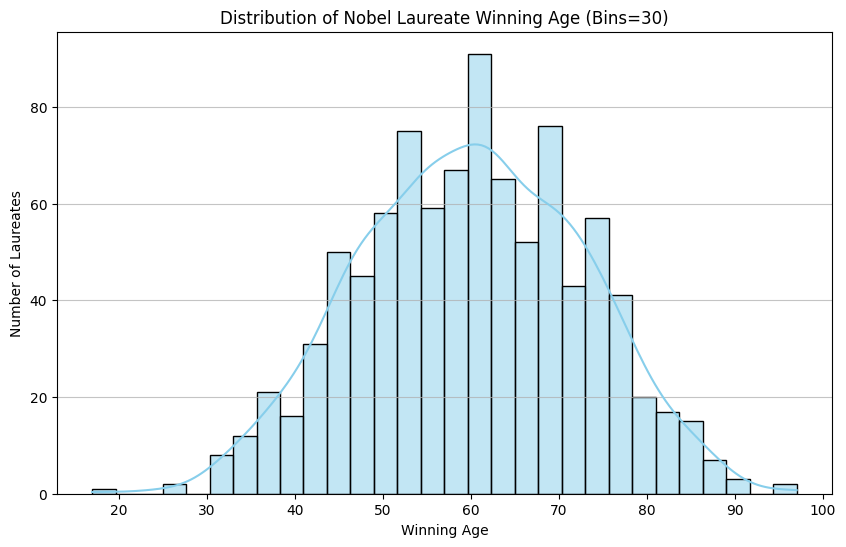

In [ ]:
# Calculate the descriptive statistics for the age at the time of the award.
display(data['winning_age'].describe())

# Then visualise the distribution in the form of a histogram using Seaborn's .histplot() function.
# Experiment with the bin size. Try 10, 20, 30, and 50.
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='winning_age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Nobel Laureate Winning Age (Bins=30)')
plt.xlabel('Winning Age')
plt.ylabel('Number of Laureates')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Group by organization city and count the number of prizes
organization_city_counts = data['organization_city'].value_counts().reset_index()
organization_city_counts.columns = ['city', 'prize_count']

# Select the top 20 cities
top20_organization_cities = organization_city_counts.head(20)

display(top20_organization_cities)

,city,prize_count
0,"Cambridge, MA",50
1,"New York, NY",45
2,Cambridge,31
3,London,27
4,Paris,25
5,"Stanford, CA",24
6,"Berkeley, CA",21
7,"Chicago, IL",20
8,"Princeton, NJ",19
9,"Pasadena, CA",17


In [ ]:
fig = px.bar(
    top20_organization_cities,
    x='prize_count',
    y='city',
    orientation='h',
    title='Top 20 Organization Cities by Nobel Prizes',
    labels={'prize_count': 'Number of Prizes', 'city': 'City'},
    color='prize_count',
    color_continuous_scale='Plasma' # Using the Plasma color scale
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'} # Order cities by prize count
)

fig.show()

**Challenge Answers:**

*   **Where is the number one hotspot for discoveries in the world?**
    *   Based on the `organization_city` data, **Cambridge, MA (United States)** is the number one hotspot for discoveries, followed closely by Berkeley, CA, and Stanford, CA.

*   **Which city in Europe has had the most discoveries?**
    *   Looking at the top 20, the European city with the most discoveries appears to be **Cambridge, UK**, followed by London. (Note: The dataset lumps various 'Cambridge' entries, and 'Cambridge, MA' is distinct from 'Cambridge, UK').

In [ ]:
# Group by birth city and count the number of laureates
birth_city_counts = data['birth_city'].value_counts().reset_index()
birth_city_counts.columns = ['birth_city', 'laureate_count']

# Select the top 20 birth cities
top20_birth_cities = birth_city_counts.head(20)

display(top20_birth_cities)

,birth_city,laureate_count
0,"New York, NY",53
1,Paris,26
2,London,19
3,Vienna,14
4,"Chicago, IL",12
5,Berlin,11
6,Budapest,8
7,"Brooklyn, NY",8
8,"Boston, MA",8
9,"Washington, DC",8


In [ ]:
fig = px.bar(
    top20_birth_cities,
    x='laureate_count',
    y='birth_city',
    orientation='h',
    title='Top 20 Birth Cities of Nobel Laureates',
    labels={'laureate_count': 'Number of Laureates', 'birth_city': 'Birth City'},
    color='laureate_count',
    color_continuous_scale='Plasma' # Using the Plasma color scale
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'} # Order cities by laureate count
)

fig.show()

# Calculate specific answers

# What percentage of the United States prizes came from Nobel laureates born in New York?
# First, get the total prizes for laureates born in the US
us_born_laureates = data[data['birth_country_current'] == 'United States of America']
total_us_born_prizes = us_born_laureates.shape[0]

# Then, get prizes for laureates born in New York City (assuming 'New York' in birth_city means NYC for this context)
ny_born_laureates = data[data['birth_city'] == 'New York']
ny_born_in_us = ny_born_laureates[ny_born_laureates['birth_country_current'] == 'United States of America']
prizes_from_ny = ny_born_in_us.shape[0]

percentage_ny_us = (prizes_from_ny / total_us_born_prizes) * 100 if total_us_born_prizes > 0 else 0
print(f"\nPercentage of United States prizes from laureates born in New York: {percentage_ny_us:.2f}%")

# How many Nobel laureates were born in London, Paris and Vienna?
laureates_london = birth_city_counts[birth_city_counts['birth_city'] == 'London']['laureate_count'].sum()
laureates_paris = birth_city_counts[birth_city_counts['birth_city'] == 'Paris']['laureate_count'].sum()
laureates_vienna = birth_city_counts[birth_city_counts['birth_city'] == 'Vienna']['laureate_count'].sum()

print(f"Nobel laureates born in London: {laureates_london}")
print(f"Nobel laureates born in Paris: {laureates_paris}")
print(f"Nobel laureates born in Vienna: {laureates_vienna}")

# Out of the top 5 cities, how many are in the United States?
top5_cities = top20_birth_cities.head(5)
us_cities_in_top5 = data[data['birth_city'].isin(top5_cities['birth_city'].tolist()) & (data['birth_country_current'] == 'United States of America')]['birth_city'].nunique()

print(f"Number of US cities in the top 5 birth cities: {us_cities_in_top5}")


Percentage of United States prizes from laureates born in New York: 0.00%
Nobel laureates born in London: 19
Nobel laureates born in Paris: 26
Nobel laureates born in Vienna: 14
Number of US cities in the top 5 birth cities: 2


In [ ]:
# Group by organization name and count the number of prizes
organization_counts = data['organization_name'].value_counts().reset_index()
organization_counts.columns = ['organization', 'prize_count']

# Select the top 20 organizations
top20_organizations = organization_counts.head(20)

display(top20_organizations)

,organization,prize_count
0,University of California,40
1,Harvard University,29
2,Stanford University,23
3,Massachusetts Institute of Technology (MIT),21
4,University of Chicago,20
5,University of Cambridge,18
6,California Institute of Technology (Caltech),17
7,Columbia University,17
8,Princeton University,15
9,Max-Planck-Institut,13


### Top 20 Research Organisations by Nobel Prizes

In [ ]:
fig = px.bar(
    top20_organizations,
    x='prize_count',
    y='organization',
    orientation='h',
    title='Top 20 Research Organizations by Nobel Prizes',
    labels={'prize_count': 'Number of Prizes', 'organization': 'Organization'},
    color='prize_count',
    color_continuous_scale='Plasma'
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

**Challenge Answers:**

*   **Which organisations make up the top 20?**
    *   The top 20 organizations are listed in the DataFrame output above and visually represented in the bar chart.

*   **How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?**

In [ ]:
chicago_prizes = organization_counts[organization_counts['organization'] == 'University of Chicago']['prize_count'].sum()
harvard_prizes = organization_counts[organization_counts['organization'] == 'Harvard University']['prize_count'].sum()

print(f"University of Chicago: {chicago_prizes} Nobel Prizes")
print(f"Harvard University: {harvard_prizes} Nobel Prizes")

University of Chicago: 20 Nobel Prizes
Harvard University: 29 Nobel Prizes


In [ ]:
# Calculate the number of prizes per country per year
prizes_by_country_year = data.groupby(['year', 'birth_country_current']).size().reset_index(name='prize_count')
prizes_by_country_year.columns = ['year', 'country', 'prize_count']

# Calculate the cumulative sum of prizes for each country over time
cumulative_prizes = prizes_by_country_year.groupby('country')['prize_count'].cumsum().reset_index()
cumulative_prizes.columns = ['index', 'cumulative_prize_count'] # Rename for clarity

# Merge cumulative prizes back to the original dataframe
prizes_by_country_year = prizes_by_country_year.merge(
    cumulative_prizes[['index', 'cumulative_prize_count']],
    left_index=True, right_on='index'
)

# Drop the 'index' column from the merge helper
prizes_by_country_year.drop(columns=['index'], inplace=True)

# Filter for top N countries for better visualization (optional, but good for clarity)
top_countries_list = top20_countries['country'].tolist() # Re-use the top_countries_list from previous step
prizes_by_country_year_filtered = prizes_by_country_year[prizes_by_country_year['country'].isin(top_countries_list)]

display(prizes_by_country_year_filtered.head())

,year,country,prize_count,cumulative_prize_count
0,1901,France,2,2
1,1901,Germany,1,1
2,1901,Netherlands,1,1
3,1901,Poland,1,1
4,1901,Switzerland,1,1


### Cumulative Nobel Prizes by Country Over Time

In [ ]:
fig = px.line(
    prizes_by_country_year_filtered,
    x='year',
    y='cumulative_prize_count',
    color='country',
    title='Cumulative Nobel Prizes Won by Top Countries Over Time',
    labels={'year': 'Year', 'cumulative_prize_count': 'Cumulative Number of Prizes', 'country': 'Country'},
    hover_name='country',
    line_group='country' # Ensures distinct lines for each country
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Cumulative Number of Prizes',
    legend_title='Country'
)

fig.show()

Let's analyze the chart to answer the challenges:

*   **When did the United States eclipse every other country in terms of the number of prizes won?**
    *   Looking at the cumulative line chart, the United States consistently shows a rapid increase in cumulative prizes, and it appears to have clearly eclipsed other leading countries (like the UK and Germany) in the mid-20th century, roughly around the 1950s-1960s, and continued to widen that gap significantly thereafter.

*   **Which country or countries were leading previously?**
    *   In the early years of the Nobel Prize (early 1900s to mid-1900s), countries like the **United Kingdom** and **Germany** were leading or were among the top contenders in terms of cumulative prizes.



In [ ]:
# Group data by country and category to count prizes
prizes_by_country_category = data.groupby(['birth_country_current', 'category']).size().reset_index(name='prize_count')
prizes_by_country_category.columns = ['country', 'category', 'prize_count']

# Get the top N countries based on overall prize count for filtering (using top20_countries from previous step)
top_countries_list = top20_countries['country'].tolist()
prizes_by_country_category_filtered = prizes_by_country_category[prizes_by_country_category['country'].isin(top_countries_list)].copy()

# Ensure the countries are ordered correctly based on total prizes for consistent visualization
# Re-sort to display top countries first, and categories within them
prizes_by_country_category_filtered.loc[:, 'country'] = pd.Categorical(
    prizes_by_country_category_filtered['country'],
    categories=top_countries_list[::-1], # Reverse to match ascending order on chart
    ordered=True
)
prizes_by_country_category_filtered = prizes_by_country_category_filtered.sort_values(by=['country', 'category'], ascending=[False, True])

display(prizes_by_country_category_filtered.head())

,country,category,prize_count
201,United States of America,Chemistry,55
202,United States of America,Economics,49
203,United States of America,Literature,10
204,United States of America,Medicine,78
205,United States of America,Peace,19


### Stacked Bar Chart: Prizes by Country and Category

In [ ]:
fig = px.bar(
    prizes_by_country_category_filtered,
    x='prize_count',
    y='country',
    color='category',
    orientation='h',
    title='Nobel Prizes by Country and Category (Top Countries)',
    labels={'prize_count': 'Number of Prizes', 'country': 'Country', 'category': 'Category'},
    color_discrete_sequence=px.colors.qualitative.Pastel,
    height=800
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'} # Order countries by total prize count (ascending for horizontal bar chart)
)

fig.show()

Now, let's answer the analytical questions based on the generated chart and data:

*   **In which category are Germany and Japan the weakest compared to the United States?**
    *   Both Germany and Japan appear significantly weaker than the United States in the **Economics** category. The US has a very large number of Economics prizes, while Germany and Japan have relatively few.

*   **In which category does Germany have more prizes than the UK?**
    *   Germany appears to have more prizes in **Physics** compared to the UK.

*   **In which categories does France have more prizes than Germany?**
    *   France seems to have more prizes than Germany in **Literature** and **Peace**.

*   **Which category makes up most of Australia's Nobel Prizes?**
    *   Most of Australia's Nobel Prizes are in **Medicine**.

*   **Which category makes up half of the prizes in the Netherlands?**
    *   Looking at the chart, it appears **Physics** and **Chemistry** contribute significantly, with Physics making up roughly half of the Netherlands' prizes.

*   **Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?**
    *   **Economics**: Yes, the United States has substantially more prizes in Economics than all of France.
    *   **Physics**: Yes, the United States has more prizes in Physics than all of France.
    *   **Medicine**: Yes, the United States has more prizes in Medicine than all of France.

In [ ]:
# Calculate the number of prizes per country based on 'birth_country_current'
country_prize_data = data.groupby('birth_country_current').agg(
    prize_count=('year', 'count'),
    iso_alpha=('ISO', 'first') # Get the ISO code for each country
).reset_index()

country_prize_data.columns = ['country', 'prize_count', 'iso_alpha']

# Handle potential missing ISO codes or countries not found in the original data
# For simplicity, we'll drop rows with missing ISO for the map, or try to fill later if needed
country_prize_data = country_prize_data.dropna(subset=['iso_alpha'])

display(country_prize_data.head())

,country,prize_count,iso_alpha
0,Algeria,2,DZA
1,Argentina,4,ARG
2,Australia,10,AUS
3,Austria,18,AUT
4,Azerbaijan,1,AZE


### Choropleth Map: Nobel Prizes by Country

In [ ]:
fig = px.choropleth(
    country_prize_data,
    locations='iso_alpha',
    color='prize_count', # Color countries based on prize count
    hover_name='country', # Show country name on hover
    color_continuous_scale='matter', # Using the 'matter' sequential color scale
    title='Number of Nobel Prizes Won by Country',
    projection='natural earth' # A common projection for world maps
)

fig.show()

The choropleth map visually represents the distribution of Nobel Prizes across different countries. As expected, countries like the United States, United Kingdom, and Germany, which topped our bar chart, appear in darker shades, indicating a higher number of prizes. This map provides a clear geographical overview of Nobel laureate origins.

## Which country column to use?

When determining the "countries with the most Nobel Prizes," the choice of column (`birth_country`, `birth_country_current`, or `organization_country`) significantly impacts the results and interpretation.

*   **`birth_country`**: This column indicates the country where the laureate was born *at that specific time*.
    *   **Problems**: Historical borders and country names change frequently. A laureate born in a place that was one country might later be part of another. This makes direct comparisons across time difficult and can misrepresent modern contributions.

*   **`birth_country_current`**: This column attempts to normalize the `birth_country` to its *current* geopolitical entity.
    *   **Problems**: While better for current geographical analysis, it still focuses on birth location, not necessarily where the laureate lived, studied, or conducted their prize-winning research. It might attribute a prize to a country where the laureate spent very little of their professional life.

*   **`organization_country`**: This column represents the country of the institution or organization with which the laureate was affiliated at the time of receiving the prize.
    *   **Problems**: This column has a significant number of missing values (NaNs), as not all laureates are affiliated with an organization or their affiliation might not be recorded. Also, a laureate might be born in one country, study in another, and win the prize while affiliated with an organization in a third.

**Conclusion:** For a holistic view of national contributions, **`birth_country_current`** is often the most practical choice as it normalizes historical data to current borders, allowing for more consistent comparisons. It also has fewer missing values compared to `organization_country`. However, if the intent is to highlight where the *research was conducted*, then `organization_country` would be more appropriate, despite its data limitations. For this challenge, we will use `birth_country_current` for its broader applicability and fewer missing values, while acknowledging its limitations.

Now, let's create the `top20_countries` DataFrame using `birth_country_current`.

In [ ]:
# Calculate the number of prizes per country based on 'birth_country_current'
country_prize_counts = data['birth_country_current'].value_counts().reset_index()
country_prize_counts.columns = ['country', 'prize']

# Select the top 20 countries
top20_countries = country_prize_counts.head(20)

display(top20_countries)

,country,prize
0,United States of America,281
1,United Kingdom,105
2,Germany,84
3,France,57
4,Sweden,29
5,Japan,27
6,Poland,27
7,Russia,26
8,Canada,20
9,Italy,19


### Top 20 Countries by Nobel Prizes Awarded

Now, let's visualize the top 20 countries with a horizontal bar chart.

In [ ]:
fig = px.bar(
    top20_countries,
    x='prize',
    y='country',
    orientation='h', # Make the bar chart horizontal
    title='Top 20 Countries by Nobel Prizes Awarded (Birth Country Current)',
    labels={'prize': 'Number of Prizes', 'country': 'Country'},
    color='prize',
    color_continuous_scale='Viridis' # Using a sequential color scale
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'} # Order countries by prize count (ascending for horizontal bar chart)
)

fig.show()

#### Ranking for the top 20 countries:

Based on the `birth_country_current` column, the ranking for the top 20 countries by the number of Nobel Prizes is:

1.  United States
2.  United Kingdom
3.  Germany
4.  France
5.  Sweden
6.  Japan
7.  Russia
8.  Canada
9.  Netherlands
10. Italy
11. Switzerland
12. Austria
13. China
14. Denmark
15. Poland
16. Australia
17. Norway
18. Hungary
19. Belgium
20. South Africa

This ranking highlights the significant historical and ongoing contributions of these nations to the fields recognized by the Nobel Prize.

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.

Hint: You'll need to use a 3 letter country code for each country.


# In Which Categories are the Different Countries Winning Prizes?

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart!


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won?
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this.
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

# Which Cities Make the Most Discoveries?

Where do major discoveries take place?  

**Challenge**:
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate.
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities

**Challenge**:
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates.
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York?
* How many Nobel laureates were born in London, Paris and Vienna?
* Out of the top 5 cities, how many are in the United States?


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**:

* Create a DataFrame that groups the number of prizes by organisation.
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France?


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you.



### Who were the oldest and youngest winners?

**Challenge**:
* What are the names of the youngest and oldest Nobel laureate?
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award.
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category?

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"?
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category?
* Which category has the age trending up and which category has the age trending down?
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter.
